# INSTACART MARKET BASKET ANALYSIS

**Group members:**
* Andres Salguero - C0932873
* Andrea Franco - C0931897
* Uma Varadaraj - C0935831
* Pallavi Sathyanarayana - C0935830
* Amritakaur badhan - C0928455

**LINK TO THE STREAMLIT DEPLOYMENT:** https://visualization-market-basket-ycseb47iyjoqg725bbudet.streamlit.app/

# Abstract

Due to the high complexity of the retail sector dynamics and the high competition between brands to become the preferred option of costumers, it becomes a priority to came with new strategies to efficiently analyze retail data and get insights so the companies can perform informed decision-making.
The following project aims to discover relationships among different products and get insights of customer purchasing patterns and predicting the product’s reordering behavior by processing and analyzing the Instacart Market Basket Analysis dataset which contains more than 3 million grocery orders from over 200,000 users and allow future work to calculate the probability of the user purchasing a product from a category after buying from another. This analysis will provide the actionable insights regarding customer preferences and co-purchasing tendencies.

Preprocessing and feature engineering were performed to ensure that the dataset is ready for further association rules and data modeling that will result in personalized marketing strategies, enhancing inventory management and improving overall operational efficiency in the industry, showing the potential of advanced methodologies like data analytics to increase business growth.


# Introduction

In the modern retail sector, understanding customer purchasing habits and predicting product reordering trends is very important to improve inventory management, increase customer satisfaction, and gain revenue. Predict the probability of a costumer reordering a product using business project-driven advanced statistical data methodologies are pivotal to optimize inventories, enhance customer satisfaction, and improve revenue.

The following sections of the project covers data preprocessing, cleaning and analysis of the dataset behind the to identify patterns with the data.


# Dataset Details

The [Instacart Dataset](https://www.kaggle.com/c/instacart-market-basket-analysis/overview) is a open sourced dataset that contains more than 3 Million Instacart Orders from the Instacart delivery app, and a grocery ordering website published in a Kaggle competition which goal is to make it easy for customers to order their favorite grocery products at their comfort level.

The dataset originally is divided into 5 main csv files with information about:

* aisles
* departments
* order-products relations
* orders
* products

Those dataset were merged into a single dataset  and sampled to get only 80,000 samples to perform the analysis more easily and using the available computational resources.

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataset Merging

In [ ]:
path = '/datasets/original/'

In [ ]:
aisles_df = pd.read_csv(path +"aisles.csv")
order_prods_prior_df = pd.read_csv(path +"order_products__prior.csv")
order_prods_train_df = pd.read_csv(path +"order_products__train.csv")
orders_df = pd.read_csv(path +"orders.csv")
products_df = pd.read_csv(path +"products.csv")

In [ ]:
print("aisles shape: ", aisles_df.shape)
print("order_prods_prior shape: ", order_prods_prior_df.shape)
print("order_prods_train shape: ", order_prods_train_df.shape)
print("orders shape: ", orders_df.shape)
print("products shape: ", products_df.shape)

aisles shape:  (134, 2)
order_prods_prior shape:  (32434489, 4)
order_prods_train shape:  (1384617, 4)
orders shape:  (3421083, 7)
products shape:  (49688, 4)


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Reduce the number of aisles

In [ ]:
aisles_df['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

Map into 5 big categories

In [ ]:
def categorize_aisle(aisle):
    fresh_foods = ['fresh fruits', 'fresh vegetables', 'fresh herbs', 'poultry counter', 'seafood counter', 'meat counter', 'fresh dips tapenades']
    packaged_foods = ['energy granola bars', 'instant foods', 'bakery desserts', 'pasta sauce', 'baking ingredients', 'bulk dried fruits vegetables', 'popcorn jerky', 'candy chocolate', 'cookies cakes', 'crackers', 'chips pretzels', 'cereal', 'dry pasta', 'grains rice dried goods', 'packaged vegetables fruits', 'trail mix snack mix', 'soup broth bouillon', 'canned meals beans', 'canned jarred vegetables', 'canned meat seafood', 'canned fruit applesauce', 'spices seasonings', 'condiments', 'granola', 'preserved dips spreads', 'salad dressing toppings']
    beverages = ['coffee', 'tea', 'juice nectars', 'soft drinks', 'water seltzer sparkling water', 'energy sports drinks', 'protein meal replacements', 'beers coolers', 'red wines', 'white wines', 'spirits', 'specialty wines champagnes', 'cocoa drink mixes', 'frozen juice']
    household_care = ['kitchen supplies', 'oral hygiene', 'soap', 'paper goods', 'shave needs', 'diapers wipes', 'trash bags liners', 'eye ear care', 'vitamins supplements', 'facial care', 'dish detergents', 'laundry', 'deodorants', 'air fresheners candles', 'baby bath body care', 'skin care', 'plates bowls cups flatware', 'cleaning products', 'first aid', 'feminine care', 'body lotions soap', 'muscles joints pain relief', 'beauty']
    frozen_refrigerated = ['frozen meat seafood', 'frozen meals', 'frozen vegan vegetarian', 'frozen breads doughs', 'frozen breakfast', 'ice cream ice', 'ice cream toppings', 'refrigerated', 'milk', 'yogurt', 'butter', 'cream', 'soy lactosefree', 'refrigerated pudding desserts', 'frozen produce', 'frozen pizza', 'frozen appetizers sides', 'frozen dessert']

    if aisle in fresh_foods:
        return 'Fresh Foods'
    elif aisle in packaged_foods:
        return 'Packaged Foods'
    elif aisle in beverages:
        return 'Beverages'
    elif aisle in household_care:
        return 'Household & Personal Care'
    elif aisle in frozen_refrigerated:
        return 'Frozen & Refrigerated Items'
    else:
        return 'Other'

# Apply the function to your dataframe
aisles_df['aisle_category'] = aisles_df['aisle'].apply(categorize_aisle)


In [ ]:
aisles_df.head()

,aisle_id,aisle,aisle_category
0,1,prepared soups salads,Other
1,2,specialty cheeses,Other
2,3,energy granola bars,Packaged Foods
3,4,instant foods,Packaged Foods
4,5,marinades meat preparation,Other


In [ ]:
aisles_df['aisle_category'].value_counts()

aisle_category
Other                          46
Packaged Foods                 26
Household & Personal Care      23
Frozen & Refrigerated Items    18
Beverages                      14
Fresh Foods                     7
Name: count, dtype: int64

In [ ]:
order_prods_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
departments_df = pd.read_csv(path+"departments.csv")
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Order-Product Details:
First, we merge the order_products data with orders to attach order-specific information to each product ordered.

In [ ]:
order_products_merged = order_prods_prior_df.merge(orders_df, on='order_id', how='left')

In [ ]:
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


### Add Product Information:
Merge the order_products_merged with products to attach product-specific details.

In [ ]:
order_products_merged = order_products_merged.merge(products_df, on='product_id', how='left')


In [ ]:
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


### Add Aisle and Department Information:
Next, merge order_products_merged with aisles and departments to include aisle and department names.

In [ ]:
order_products_merged = order_products_merged.merge(aisles_df, on='aisle_id', how='left')
order_products_merged = order_products_merged.merge(departments_df, on='department_id', how='left')


In [ ]:
order_products_merged.head()

In [ ]:
order_products_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  aisle_category          object 
 15  department              object 
dtypes: float64(1), int64(10), object(5)
memory usage: 3.9+ GB


In [ ]:
order_products_merged.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,2078068


In [ ]:
order_products_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'aisle_category', 'department'],
      dtype='object')

# Sampling the dataset

As the dataset is to large to process, we are sampling and taking 25% of the origninal merged data.

To ensure that the 25% sample accurately represents the overall distribution of the original dataset, we use random sampling with replacement. This technique randomly selects rows from the dataset, allowing for the same row to be selected multiple times.

In [ ]:
# Sample 0.25% of the data, allowing for replacement
sample_df = order_products_merged.sample(frac=0.0025, replace=True)

# Save the sample to a new CSV file
sample_df.to_csv('sample_dataset_clean.csv', index=False)

# Introducing noise in the dataset

As the dataset doesn't require too much cleaning besides transforming NaN values of one column to zero, we are introducing artificial noise to simulate real data.

In [ ]:
sample_df = pd.read_csv('/datasets/sample_dataset_clean.csv')

In [ ]:
import numpy as np

# 1. Introduce missing values in categorical columns
sample_df.loc[np.random.choice(sample_df.index, size=int(0.05*len(sample_df)), replace=False), 'aisle_category'] = np.nan
sample_df.loc[np.random.choice(sample_df.index, size=int(0.03*len(sample_df)), replace=False), 'department'] = np.nan

# 2. Introduce outliers in numerical columns
# Outliers in 'days_since_prior_order'
sample_df.loc[np.random.choice(sample_df.index, size=int(0.02*len(sample_df)), replace=False), 'days_since_prior_order'] *= 100

# Outliers in 'order_hour_of_day' (making some hours extremely early or late)
# Get the random indices first to ensure consistent size
random_indices = np.random.choice(sample_df.index, size=int(0.01 * len(sample_df)), replace=False)

# Assign using the same indices for both row selection and value generation
sample_df.loc[random_indices, 'order_hour_of_day'] = np.random.randint(25, 30, size=len(random_indices))

# 3. Convert numerical columns to strings
sample_df['order_hour_of_day'] = sample_df['order_hour_of_day'].astype(str)

# 4. Introduce non-numeric characters into numeric columns
sample_df.loc[np.random.choice(sample_df.index, size=int(0.01*len(sample_df)), replace=False), 'order_hour_of_day'] += 'a'

# Save the modified dataset
sample_df.to_csv('/datasets/data.csv', index=False)

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8108622 entries, 0 to 8108621
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       object 
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  aisle_category          object 
 15  department              object 
dtypes: float64(1), int64(9), object(6)
memory usage: 989.8+ MB


In [ ]:
sample_df.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,520158


In [ ]:
sample_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,aisle_category,department
0,382699,43643,10,1,127314,prior,4,5,13,13.0,Organic Strawana Probugs Kefir,120,16,yogurt,Frozen & Refrigerated Items,dairy eggs
1,1213384,47209,3,1,101075,prior,15,3,8,26.0,Organic Hass Avocado,24,4,fresh fruits,Fresh Foods,produce
2,952058,17794,1,1,194460,prior,8,1,11,8.0,Carrots,83,4,fresh vegetables,Fresh Foods,produce
3,2463870,28632,12,0,99016,prior,1,5,9,NaN,Premium Sweet Petites Carrots,123,4,packaged vegetables fruits,Packaged Foods,produce
4,1558201,46802,11,0,79541,prior,30,2,13,14.0,Pineapple Chunks,116,1,frozen produce,Frozen & Refrigerated Items,frozen


# Pre-processing

In [ ]:
# read the data
df = pd.read_csv('streamlit/data.csv')

In [ ]:
df['days_since_prior_order'].fillna(0, inplace=True)
df.isnull().sum()

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_14664\3795974286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prior_order'].fillna(0, inplace=True)


order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
aisle_category            0
department                0
dtype: int64

Convert to the appropiate numerical format

In [ ]:
df['order_hour_of_day'] = pd.to_numeric(df['order_hour_of_day'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81086 entries, 0 to 81085
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                81086 non-null  int64  
 1   product_id              81086 non-null  int64  
 2   add_to_cart_order       81086 non-null  int64  
 3   reordered               81086 non-null  int64  
 4   user_id                 81086 non-null  int64  
 5   eval_set                81086 non-null  object 
 6   order_number            81086 non-null  int64  
 7   order_dow               81086 non-null  int64  
 8   order_hour_of_day       80288 non-null  float64
 9   days_since_prior_order  81086 non-null  float64
 10  product_name            81086 non-null  object 
 11  aisle_id                81086 non-null  int64  
 12  department_id           81086 non-null  int64  
 13  aisle                   81086 non-null  object 
 14  aisle_category          81086 non-null

### Data Validation and Outliers handling

We should eliminate invalid values like hours of the day outside of the normal range (0-24)

<Axes: ylabel='order_hour_of_day'>

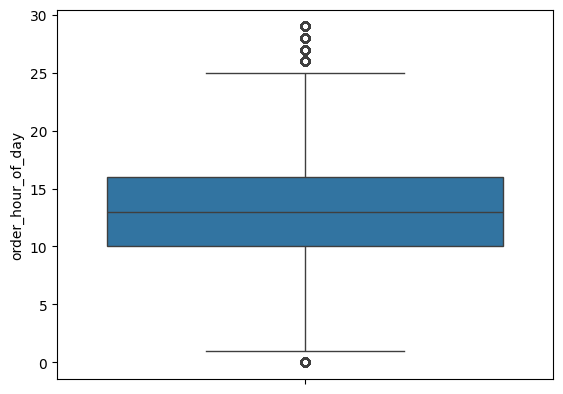

In [ ]:
sns.boxplot(df['order_hour_of_day'])

In [ ]:
df['order_hour_of_day'].unique()

array([18., 11., 13., 14., 17., 15., 16., 23.,  0., 12., 10.,  8.,  9.,
       19., 20.,  6., 21.,  7., 22., nan, 25.,  3.,  5.,  1.,  2.,  4.,
       27., 29., 28., 26.])

In [ ]:
df['order_hour_of_day'] = df['order_hour_of_day'][df['order_hour_of_day'] <= 24]
df['order_hour_of_day'].unique()

array([18., 11., 13., 14., 17., 15., 16., 23.,  0., 12., 10.,  8.,  9.,
       19., 20.,  6., 21.,  7., 22., nan,  3.,  5.,  1.,  2.,  4.])

<Axes: ylabel='order_dow'>

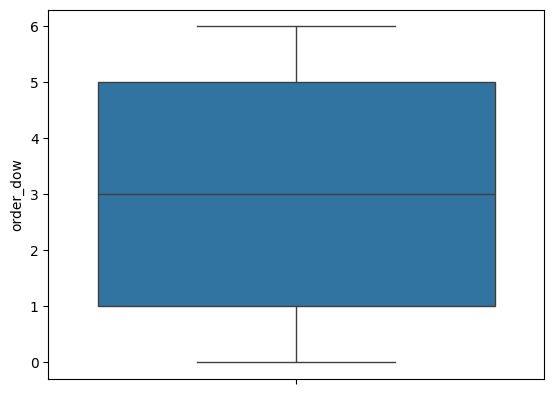

In [ ]:
sns.boxplot(df['order_dow'])

In [ ]:
df['order_dow'].unique()

array([6, 0, 5, 3, 2, 1, 4])

This column has significant outliers

<Axes: ylabel='days_since_prior_order'>

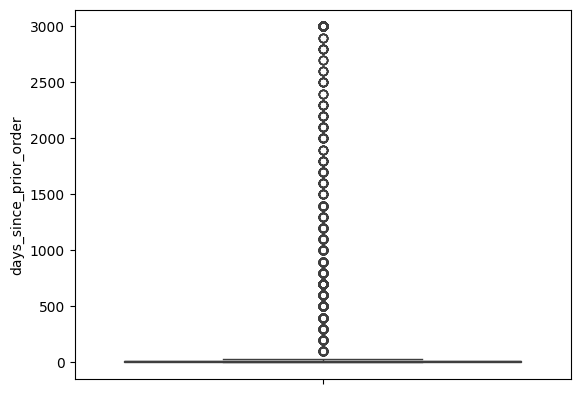

In [ ]:
sns.boxplot(df["days_since_prior_order"])

In [ ]:
df["days_since_prior_order"].describe()

count    81086.000000
mean        30.678231
std        186.714053
min          0.000000
25%          5.000000
50%          8.000000
75%         15.000000
max       3000.000000
Name: days_since_prior_order, dtype: float64

In [ ]:
more_than_year =  df["days_since_prior_order"][df["days_since_prior_order"] > 30].count()
print("Outliers in Days since Prior order:", more_than_year)
print("Proportion of outliers:", round(more_than_year*100/df.shape[0], 2), "%")

Outliers in Days since Prior order: 1449
Proportion of outliers: 1.79 %


As the proportion of outliers is minimal, we can eliminate them:

<Axes: ylabel='days_since_prior_order'>

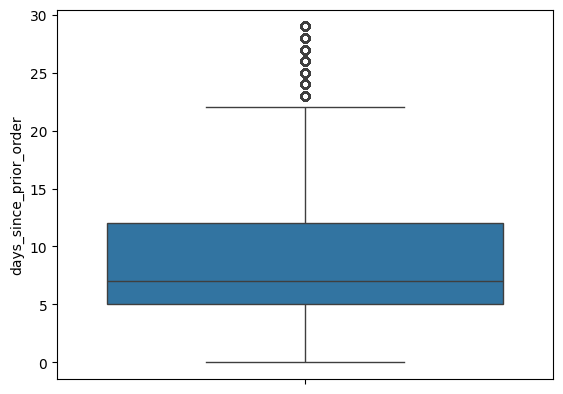

In [ ]:
df['days_since_prior_order'] =  df["days_since_prior_order"][df["days_since_prior_order"] < 30]
sns.boxplot(df['days_since_prior_order'])

### Handling missing values

In [ ]:
df.isnull().sum()

order_id                     0
product_id                   0
add_to_cart_order            0
reordered                    0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day         1571
days_since_prior_order    8906
product_name                 0
aisle_id                     0
department_id                0
aisle                        0
aisle_category               0
department                   0
dtype: int64

For hours of the day we can add a cero for non previous order information

In [ ]:
# Fill missing values with 0
df['days_since_prior_order'].fillna(0, inplace=True)
df['days_since_prior_order'].isnull().sum()

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_14664\1013730835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prior_order'].fillna(0, inplace=True)


np.int64(0)

In [ ]:
# Fill missing values with mode
df['order_hour_of_day'].fillna(df['order_hour_of_day'].mode()[0], inplace=True)
df['order_hour_of_day'].isnull().sum()

C:\Users\Andrea FS\AppData\Local\Temp\ipykernel_14664\1608081866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_hour_of_day'].fillna(df['order_hour_of_day'].mode()[0], inplace=True)


np.int64(0)

In [ ]:
df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
aisle_category            0
department                0
dtype: int64

In [ ]:
# percentage of 'Unknown' category in the 'aisle_category' column
df['aisle_category'].value_counts(normalize=True)

aisle_category
Fresh Foods                    0.234837
Packaged Foods                 0.221937
Other                          0.208421
Frozen & Refrigerated Items    0.188195
Beverages                      0.068002
Unknown                        0.049355
Household & Personal Care      0.029253
Name: proportion, dtype: float64

In [ ]:
df['department'].unique()

array(['snacks', 'pantry', 'produce', 'dairy eggs', 'beverages', 'bakery',
       'deli', 'frozen', 'breakfast', 'canned goods', 'Unknown',
       'international', 'meat seafood', 'household', 'dry goods pasta',
       'personal care', 'missing', 'babies', 'pets', 'other', 'alcohol',
       'bulk'], dtype=object)

In [ ]:
df['aisle_category'].unique()

array(['Packaged Foods', 'Other', 'Fresh Foods', 'Unknown', 'Beverages',
       'Frozen & Refrigerated Items', 'Household & Personal Care'],
      dtype=object)

In [ ]:
# Drop rows where 'aisle_category' or 'department' is 'Unknown'
df = df[(df['aisle_category'] != 'Unknown') & (df['department'] != 'Unknown')]


# Visualizations

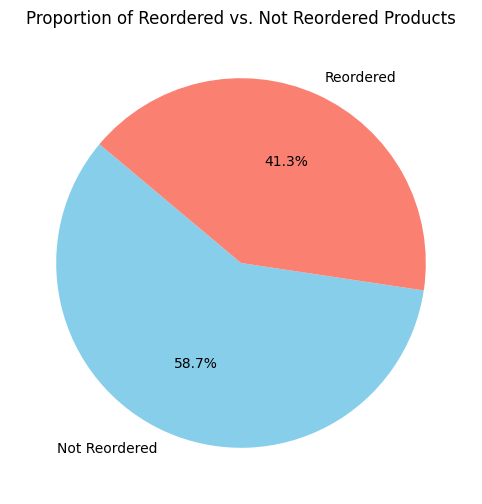

In [ ]:
# Calculate proportions
reordered_counts = df['reordered'].value_counts()
reordered_labels = ['Not Reordered', 'Reordered']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    reordered_counts,
    labels=reordered_labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate for better view
    colors=['skyblue', 'salmon']  # Distinct colors
)
plt.title('Proportion of Reordered vs. Not Reordered Products')
plt.show()




The  not reorder percentage is greater than the reordered, it means that the majority of products are purchased only once, maybe because are less essential for the customers

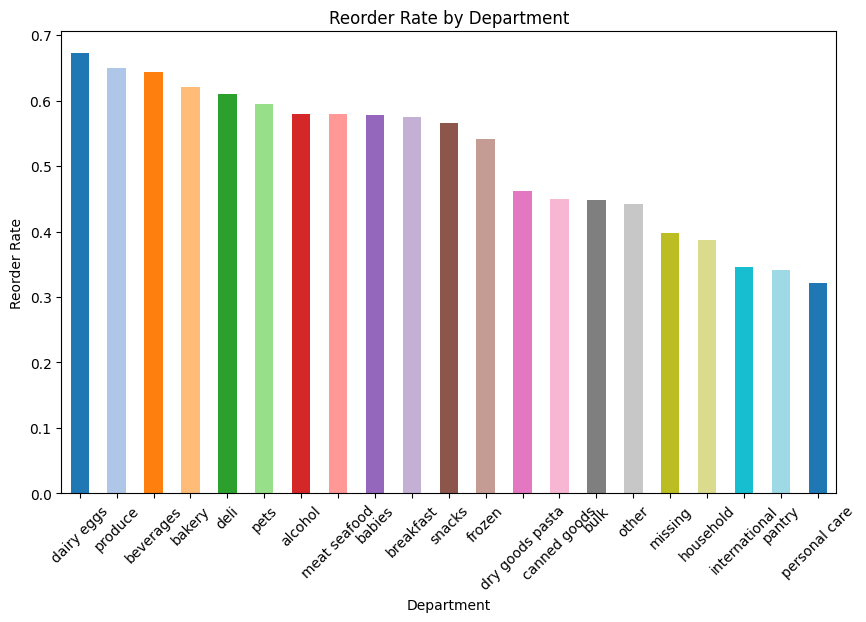

In [ ]:
# Aggregate reorder rates by department with observed=True
dept_reorder = (
    df.groupby('department', observed=True)['reordered']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
dept_reorder.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45)
plt.show()


Departments like "dairy eggs," "produce," and "beverages" have the highest reorder rates which could mean that for that sample they are essential or frequently consumed products, such as fresh produce, milk, or beverages, which customers purchase regularly

On the other hand, departments like "personal care," "pantry," and "international" have the lowest reorder rates. These products might either be bought less frequently, last longer (e.g., non-perishable items), or cater to niche needs

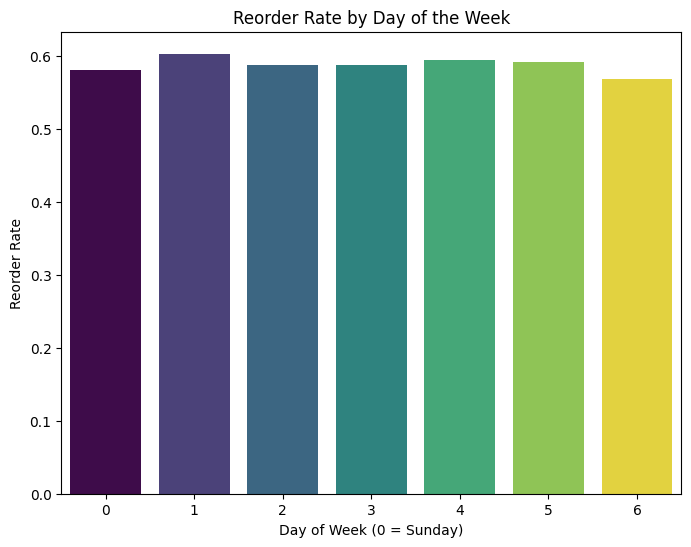

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='order_dow',
    y='reordered',
    data=df,
    errorbar=None,
    hue='order_dow',
    palette='viridis',
    dodge=False
)

plt.title('Reorder Rate by Day of the Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Reorder Rate')


plt.legend([], [], frameon=False)

plt.show()

The day 1 is the one with the highest reorder rate, so is more likely the customers reorder product on Monday, maybe that means the customer trend to restocking groceries after the weekend, preparing for the week ahead. Marketing emails will be very effective on Sunday night, helping the sells the next day.

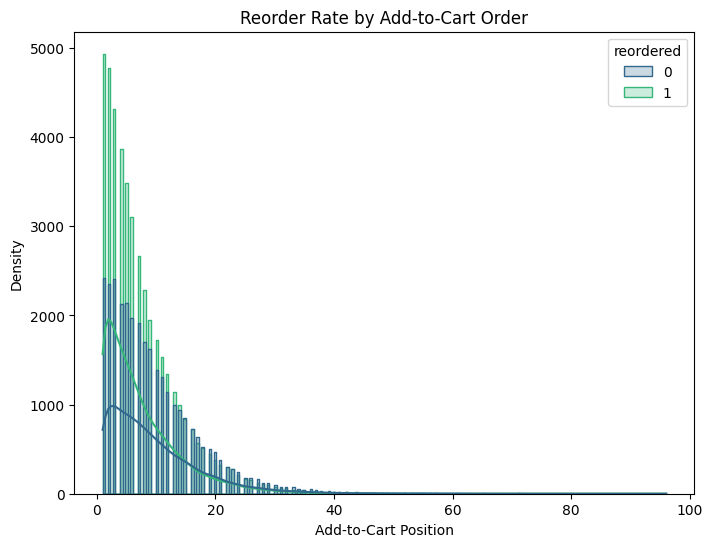

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='add_to_cart_order', hue='reordered', kde=True, element="step", palette='viridis')
plt.title('Reorder Rate by Add-to-Cart Order')
plt.xlabel('Add-to-Cart Position')
plt.ylabel('Density')
plt.show()


This plot shows that reorder a product is more likely on the first products added to the cart, that means the customers prioritize more regular purchased items because are part of their routines

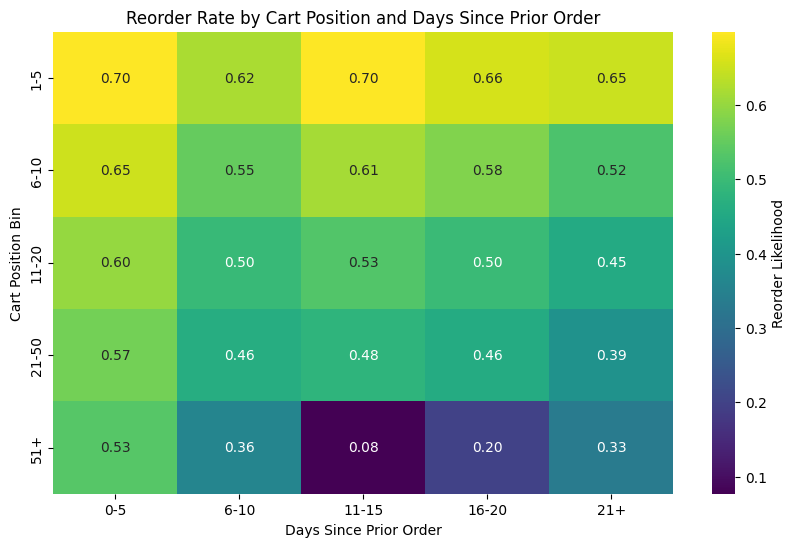

In [ ]:
# Bin `add_to_cart_order` and `days_since_prior_order`
df['cart_bin'] = pd.cut(df['add_to_cart_order'], bins=[0, 5, 10, 20, 50, 100], labels=['1-5', '6-10', '11-20', '21-50', '51+'])
df['days_bin'] = pd.cut(df['days_since_prior_order'], bins=[0, 5, 10, 15, 20, 30], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Pivot table with observed=True to avoid FutureWarning
heatmap_data = df.pivot_table(index='cart_bin', columns='days_bin', values='reordered', aggfunc='mean', observed=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Reorder Likelihood'})
plt.title('Reorder Rate by Cart Position and Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Cart Position Bin')
plt.show()

With this heatmap for bins of cart position and days since prior order we can analyze that the products added first to the cart are reorder more quickly, that identify a pattern or essential products that needs to be replaced frequently

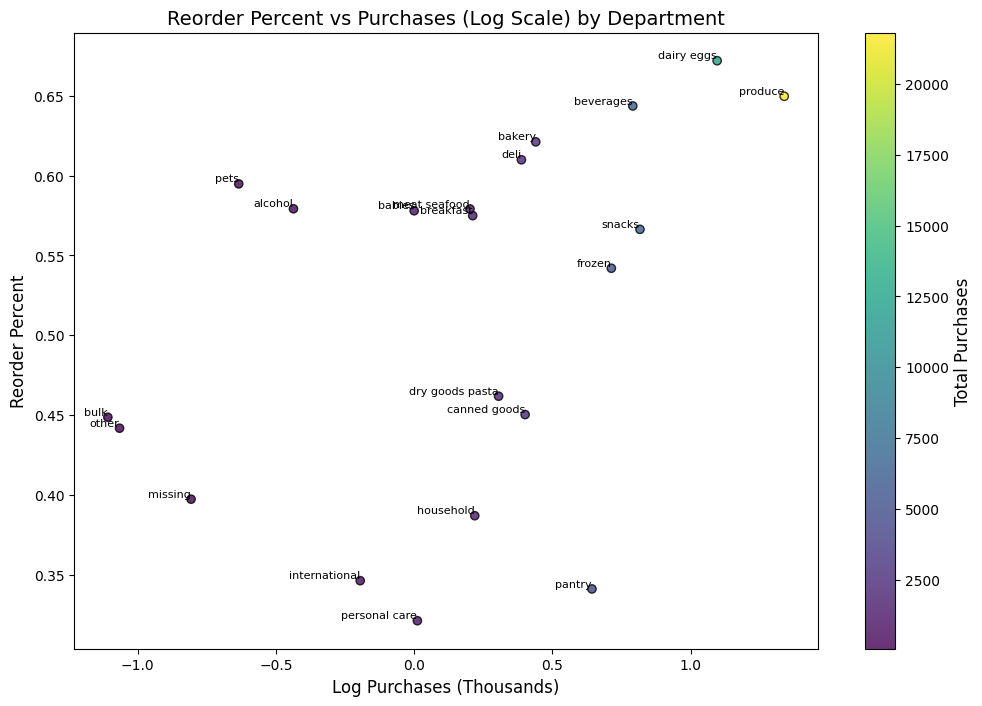

In [ ]:
# Calculate percent of reorders and total purchases per department
department_stats = df.groupby('department', observed=True).agg(
    total_purchases=('reordered', 'size'),
    reorder_percent=('reordered', 'mean')
).reset_index()

# Convert total purchases to thousands and apply log scale
department_stats['log_purchases'] = np.log10(department_stats['total_purchases'] / 1000)

# Scatter plot with department names as labels
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(
    x=department_stats['log_purchases'],
    y=department_stats['reorder_percent'],
    c=department_stats['total_purchases'],  # Color by total purchases
    cmap='viridis',
    alpha=0.8,
    edgecolor='k'
)

# Add department labels
for i, department in enumerate(department_stats['department']):
    ax.text(
        x=department_stats['log_purchases'].iloc[i],
        y=department_stats['reorder_percent'].iloc[i],
        s=department,
        fontsize=8,
        ha='right',  # Align text to the right
        va='bottom'  # Align text slightly below the point
    )

# Add colorbar for purchases
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Total Purchases', fontsize=12)

# Set title and axis labels
ax.set_title('Reorder Percent vs Purchases (Log Scale) by Department', fontsize=14)
ax.set_xlabel('Log Purchases (Thousands)', fontsize=12)
ax.set_ylabel('Reorder Percent', fontsize=12)

# Render plot locally
plt.show()



The previous scatter plot on the other hand shows that departments with a high reorder percent and large total purchases represent recurring, essential products.


# Conclusions

The analysis of customer reorder behavior reveals important patterns that are crucial for understanding shopping habits and optimizing business strategies. The data demonstrates that **reorder likelihood** is significantly influenced by factors such as the timing of orders, the positioning of items in the cart, and the interval between purchases.

**Implications for Business:**
The insights derived from this analysis provide a solid foundation for building predictive models that classify products based on their reorder potential. Such models can drive personalized recommendations, targeted promotions, and better inventory management, ultimately enhancing customer loyalty and operational efficiency.


# References

* jeremy stanley, Meg Risdal, sharathrao, and Will Cukierski. Instacart Market Basket Analysis. https://kaggle.com/competitions/instacart-market-basket-analysis, 2017. Kaggle.